# História das Olimpíadas

Após um ano de atraso por conta da pandemia de Covid-19, as atenções do mundo todo se voltaram para Tóquio, no Japão, para acompanhar mais uma edição das Olimpíadas.

No Brasil não foi diferente, e muitos se uniram para torcer por nossos atletas em diferentes competições, tanto em esportes onde o Brasil já possui tradição quanto em novos esportes.

Vamos aproveitar o clima para estudar um pouco das Olimpíadas! Utilizaremos um _dataset_ com 120 anos de dados históricos das Olimpíadas, cobrindo desde os jogos de Atenas 1896 até Rio 2016. 

Faça o download do _dataset_ em https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results e carregue o arquivo ```athlete_events.csv``` para um DataFrame utilizando Pandas. Aproveite para explorar seu DataFrame e se familiarizar com a sua estrutura. 

OBS: Fique à vontade para acrescentar mais células Python conforme necessário em qualquer etapa do exercício.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_athletes = pd.read_csv('athlete_events.csv', sep = ',')

In [4]:
df_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## 1. O Brasil nas Olimpíadas

Vamos começar estudando o desempenho do nosso próprio país. Gere um DataFrame novo contendo apenas as informações sobre atletas brasileiros.

In [5]:
# df_athletes_brazil = df_athletes[df_athletes['Team'] == 'Brazil']
# o filtro acima não é o melhor. Tem infos como Brazil-1 e Brazil-2

df_athletes_BRA = df_athletes[df_athletes['NOC'] == 'BRA'] 

df_athletes_BRA.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3848 entries, 665 to 270789
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3848 non-null   int64  
 1   Name    3848 non-null   object 
 2   Sex     3848 non-null   object 
 3   Age     3788 non-null   float64
 4   Height  3365 non-null   float64
 5   Weight  3188 non-null   float64
 6   Team    3848 non-null   object 
 7   NOC     3848 non-null   object 
 8   Games   3848 non-null   object 
 9   Year    3848 non-null   int64  
 10  Season  3848 non-null   object 
 11  City    3848 non-null   object 
 12  Sport   3848 non-null   object 
 13  Event   3848 non-null   object 
 14  Medal   475 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 481.0+ KB


### Medalhistas

Vamos focar um pouco nos casos de sucesso do Brasil. Use o seu DataFrame anterior para filtrar apenas informações sobre **medalhistas** brasileiros. 

**DICA:** observe como a coluna ```Medal``` é representada quando o atleta não ganhou medalha.

In [12]:
df_athletes_BRA_medals = df_athletes_BRA.dropna(subset=['Medal'])
df_athletes_BRA_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver
1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold
1733,966,Daniel Adler,M,26.0,180.0,72.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver
1856,1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver


### Verão vs Inverno

Você deve ter notado que temos duas categorias distintas de jogos olímpicos, representados pela estação: temos os jogos de verão e os jogos de inverno, que ocorrem de maneira intercalada.

Agora que já conhecemos os medalhistas brasileiros, responda: quantos atletas brasileiros receberam medalha nos jogos de verão e quantos receberam nos jogos de inverno?

In [7]:
df_athletes_BRA_medals_summer = df_athletes_BRA_medals[df_athletes_BRA_medals['Season'] == 'Summer']
print(f'O número de medalhistas brasileiros nos jogos de verão é {len(df_athletes_BRA_medals_summer)}.')
df_athletes_BRA_medals_winter = df_athletes_BRA_medals[df_athletes_BRA_medals['Season'] == 'Winter']
print(f'O número de medalhistas brasileiros nos jogos de verão é {len(df_athletes_BRA_medals_winter)}.')

O número de medalhistas brasileiros nos jogos de verão é 475.
O número de medalhistas brasileiros nos jogos de verão é 0.


Os jogos de verão são bem mais populares do que os jogos de inverno no Brasil. Portanto, deste ponto em diante iremos focar apenas nos jogos de verão. Descarte de seu DataFrame os dados dos jogos de inverno.



In [13]:
df_athletes_summer = df_athletes[df_athletes['Season'] != 'Winter']
df_athletes_summer['Season'].unique()

array(['Summer'], dtype=object)

### Atletas do Brasil

Vamos conhecer um pouco melhor nossos atletas. Descubra a altura e peso médio de nossos medalhistas.

In [28]:
height_avg_BRA = df_athletes_BRA_medals['Height'].mean()
weight_avg_BRA = df_athletes_BRA_medals['Weight'].mean()
print(f'A altura média dos atletas brasileiros é {height_avg_BRA:.2f} cm e o peso médio é {weight_avg_BRA:.2f} kg.')

A altura média dos atletas brasileiros é 182.49 cm e o peso médio é 76.71 kg.


Imaginamos que diferentes esportes podem beneficiar diferentes tipos físicos, certo? Então refaça a análise anterior, mas obtendo os valores médios **por esporte**.

In [10]:
df_BRA_medals_avg = df_athletes_BRA_medals.groupby(by='Sport')[['Height', 'Weight']].mean()
df_BRA_medals_avg

,Height,Weight
Sport,,
Athletics,181.000000,74.576923
Basketball,185.607843,78.478261
Beach Volleyball,184.880000,78.160000
Boxing,170.000000,64.000000
Canoeing,175.000000,83.250000
Equestrianism,179.666667,75.000000
Football,175.803030,69.961832
Gymnastics,162.750000,63.750000
Judo,176.666667,86.285714


Será que os dados acima influenciaram no interesse geral dos atletas pelo esporte ou realmente impactaram no desempenho deles? Podemos tentar descobrir se há algum tipo de correlação.

Você ainda possui o dataframe original contendo todos os atletas brasileiros, incluindo os sem medalha? Obtenha os valores médios de peso e altura por esporte daquele dataframe e compare-o com os dos medalhistas. Há alguma diferença significativa em algum esporte?

In [43]:
df_BRA_avg = df_athletes_BRA.groupby(by='Sport')[['Height', 'Weight']].mean()
df_compare_AVG = pd.merge(df_BRA_medals_avg, df_BRA_avg, on = 'Sport', how = 'left')
df_compare_AVG.rename(columns = {'Height_x': 'AVG Height with Medal', 'Weight_x' : 'AVG Weight with Medal', 'Height_y': 'AVG Height General', 'Weight_y' : 'AVG Weight General' }, inplace = True)

In [44]:
df_compare_AVG['Height Diff M - G'] = df_compare_AVG['AVG Height with Medal'] -  df_compare_AVG['AVG Height General']
df_compare_AVG['Weight Diff M - G'] = df_compare_AVG['AVG Weight with Medal'] -  df_compare_AVG['AVG Weight General']
df_compare_AVG

,AVG Height with Medal,AVG Weight with Medal,AVG Height General,AVG Weight General,Height Diff M - G,Weight Diff M - G
Sport,,,,,,
Athletics,181.000000,74.576923,176.203463,67.795045,4.796537,6.781878
Basketball,185.607843,78.478261,190.911894,85.900474,-5.304051,-7.422213
Beach Volleyball,184.880000,78.160000,185.702128,78.617021,-0.822128,-0.457021
Boxing,170.000000,64.000000,171.985075,64.106061,-1.985075,-0.106061
Canoeing,175.000000,83.250000,177.791667,77.395833,-2.791667,5.854167
Equestrianism,179.666667,75.000000,177.429530,72.313869,2.237136,2.686131
Football,175.803030,69.961832,173.369176,67.760456,2.433855,2.201376
Gymnastics,162.750000,63.750000,157.268041,52.463918,5.481959,11.286082
Judo,176.666667,86.285714,173.925234,80.289720,2.741433,5.995995


In [ ]:
## Basketball -> Os atletas medalhistas são (em média) 5,3 cm mais baixos que a média geral e 7,4 kg mais magros.
## Gymnastics -> Os atletas medalhistas são (em média) 5,5 cm mais altos que a média geral e pesam 11,3 kg mais.
## Swimming	-> Os atletas medalhistas são (em média) 7,9 cm mais altos que a média geral e pesam 7 kg mais.
## Taekwondo -> Os atletas medalhistas são (em média) 10,2 cm mais altos que a média geral e pesam 15,9 kg mais.

Existe um detalhe importante passando batido até agora em nossa análise: as categorias esportivas costumam ser divididas por gênero justamente por conta de diferenças físicas entre homens e mulheres que poderiam influenciar no desempenho. Compare a altura e peso médios de atletas brasileiros por esporte segmentado por sexo.

In [ ]:
df_BRA_avg_bysex = df_athletes_BRA.groupby(by= ['Sport', 'Sex'])[['Height', 'Weight']].mean().dropna()
df_BRA_avg_bysex

Height     Weight
Sport         Sex                       
Alpine Skiing F    160.333333  52.333333
              M    184.153846  85.153846
Archery       F    162.857143  59.714286
              M    177.846154  78.153846
Athletics     F    167.492958  59.809859
...                       ...        ...
Water Polo    M    181.423729  85.725000
Weightlifting F    161.500000  62.750000
              M    171.777778  90.000000
Wrestling     F    169.333333  66.666667
              M    182.142857  97.285714

[75 rows x 2 columns]

Qual foi (ou quais foram) o maior medalhista brasileiro em quantidade total de medalhas?

In [327]:
most_medal_athletes = df_athletes_BRA.groupby(by = ['Name'])['Medal'].count()
most_medal = most_medal_athletes.max()
most_medal_athelet_BRA = most_medal_athletes[most_medal_athletes == most_medal]
most_medal_athelet_BRA

Name
Robert Scheidt          5
Torben Schmidt Grael    5
Name: Medal, dtype: int64

E o(s) maior(es) em quantidade de medalhas de ouro?

In [330]:
df_most_goldmedal_athlet = df_athletes_BRA[df_athletes_BRA['Medal'] == 'Gold'].groupby(by = 'Name')['Medal'].count().sort_values(ascending=False)
most_gold_medal = df_most_goldmedal_athlet.max()
most_gold_medal_BRA = df_most_goldmedal_athlet[df_most_goldmedal_athlet == most_gold_medal]
most_gold_medal_BRA

Name
Fabiana "Fabi" Alvim de Oliveira                      2
Torben Schmidt Grael                                  2
Fabiana Marcelino Claudino                            2
Giovane Farinazzo Gvio                                2
Paula Renata Marques Pequeno                          2
Sheilla Tavares de Castro Blassioli                   2
Srgio "Escadinha" Dutra dos Santos                    2
Robert Scheidt                                        2
Thasa Daher de Menezes                                2
Jaqueline Maria "Jaque" Pereira de Carvalho Endres    2
Marcelo Bastos Ferreira                               2
Maurcio Camargo Lima                                  2
Adhemar Ferreira da Silva                             2
Name: Medal, dtype: int64

Qual esporte rendeu mais medalhas de ouro para o Brasil? E qual rendeu mais medalhas no total?

**DICA:** tome muito cuidado nessa análise: cada **evento esportivo** rende 1 medalha. Por exemplo, quando a equipe de futebol vence, isso é considerado 1 medalha, mesmo tendo cerca de 20 atletas medalhistas na equipe. 

In [96]:
df_test = df_athletes_BRA_medals[df_athletes_BRA_medals['Medal'] == 'Gold'].groupby(by = ['Sport', 'Event', 'Year'])['Year'].count()
df_test.groupby('Sport').count().sort_values(ascending = False)

Sport
Sailing             7
Athletics           5
Volleyball          5
Judo                4
Beach Volleyball    3
Boxing              1
Equestrianism       1
Football            1
Gymnastics          1
Shooting            1
Swimming            1
Name: Year, dtype: int64

In [ ]:
df_test = df_athletes_BRA_medals[df_athletes_BRA_medals['Medal'] == 'Gold'].groupby(by = ['Sport', 'Event'])['Year'].count().reset_index()
df_test.drop_duplicates().groupby(by = 'Sport')['Event'].count().sort_values(ascending = False)[:1]

Cada "categoria" dentro de um esporte é considerado um evento. Por exemplo, dentro de "atletismo", temos uma competição de 100m masculina, uma de 100m feminino, um revezamento 4 x 100m masculino, um revezamento 4 x 100m feminino, uma competição de 400m masculino, uma de 400m feminino, uma maratona masculina, uma maratona feminina, e assim sucessivamente.

Sabendo disso, qual evento esportivo mais rendeu medalhas de ouro para o Brasil? E total de medalhas?

In [102]:
df_test = df_athletes_BRA_medals[df_athletes_BRA_medals['Medal'] == 'Gold'].groupby(by = ['Event', 'Year'])['Year'].count()
df_test.groupby('Event').count().sort_values(ascending = False)

Event
Volleyball Men's Volleyball                  3
Volleyball Women's Volleyball                2
Athletics Men's Triple Jump                  2
Beach Volleyball Men's Beach Volleyball      2
Sailing Mixed One Person Dinghy              2
Judo Women's Lightweight                     1
Swimming Men's 50 metres Freestyle           1
Shooting Men's Military Pistol, 30 metres    1
Sailing Women's Skiff                        1
Sailing Mixed Two Person Keelboat            1
Sailing Mixed Two Person Dinghy              1
Sailing Mixed Multihull                      1
Sailing Men's Two Person Keelboat            1
Athletics Men's 800 metres                   1
Athletics Men's Pole Vault                   1
Judo Men's Half-Lightweight                  1
Judo Men's Half-Heavyweight                  1
Gymnastics Men's Rings                       1
Football Men's Football                      1
Equestrianism Mixed Jumping, Individual      1
Boxing Men's Lightweight                     1
Beach V

Para finalizar sobre o Brasil: obtenha o total de medalhas de ouro, prata, bronze e total por ano.

In [186]:
df1 = df_athletes_BRA_medals.groupby(by = ['Year', 'Medal', 'Event']).count().reset_index()
df1 = df1.groupby(by = ['Year', 'Medal'])['Event'].count()
df1


Year  Medal 
1920  Bronze    1
      Gold      1
      Silver    1
1948  Bronze    1
1952  Bronze    2
      Gold      1
1956  Gold      1
1960  Bronze    2
1964  Bronze    1
1968  Bronze    2
      Silver    1
1972  Bronze    2
1976  Bronze    2
1980  Bronze    2
      Gold      2
1984  Bronze    2
      Gold      1
      Silver    5
1988  Bronze    3
      Gold      1
      Silver    2
1992  Gold      2
      Silver    1
1996  Bronze    9
      Gold      3
      Silver    3
2000  Bronze    6
      Silver    6
2004  Bronze    3
      Gold      5
      Silver    2
2008  Bronze    9
      Gold      3
      Silver    4
2012  Bronze    9
      Gold      3
      Silver    5
2016  Bronze    6
      Gold      7
      Silver    6
Name: Event, dtype: int64

In [450]:
# Deixando a visulização melhor e apresentando o total
df2 = df1.reset_index().rename(columns={'Event': 'Medals Brazil'})
df_BRA_olympic_medals = pd.pivot_table(df2, index = 'Year', columns = 'Medal', fill_value = 0).astype('int')['Medals Brazil'][['Gold', 'Silver', 'Bronze']] 
df_BRA_olympic_medals['Total'] = df_BRA_olympic_medals['Bronze'] + df_BRA_olympic_medals['Gold'] + df_BRA_olympic_medals['Silver']
df_BRA_olympic_medals


Medal,Gold,Silver,Bronze,Total
Year,,,,
1920,1,1,1,3
1948,0,0,1,1
1952,1,0,2,3
1956,1,0,0,1
1960,0,0,2,2
1964,0,0,1,1
1968,0,1,2,3
1972,0,0,2,2
1976,0,0,2,2


## 2. O mundo nos jogos de verão

Vamos agora analisar um pouquinho do que aconteceu nas Olimpíadas de verão em todo o mundo.

Retome o DataFrame original e descarte as informações sobre os jogos de inverno.

In [180]:
df_athletes_summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


Obtenha a lista de todos os esportes já disputados nas olimpíadas de verão.

In [ ]:
summer_events = list(df_athletes_summer['Event'].unique())
print(sorted(summer_events))

Obtenha a lista de todas as modalidades esportivas já disputadas nas olimpíadas de verão.

In [201]:
summer_sports = list(df_athletes_summer['Sport'].unique())
print(sorted(summer_sports))

['Aeronautics', 'Alpinism', 'Archery', 'Art Competitions', 'Athletics', 'Badminton', 'Baseball', 'Basketball', 'Basque Pelota', 'Beach Volleyball', 'Boxing', 'Canoeing', 'Cricket', 'Croquet', 'Cycling', 'Diving', 'Equestrianism', 'Fencing', 'Figure Skating', 'Football', 'Golf', 'Gymnastics', 'Handball', 'Hockey', 'Ice Hockey', 'Jeu De Paume', 'Judo', 'Lacrosse', 'Modern Pentathlon', 'Motorboating', 'Polo', 'Racquets', 'Rhythmic Gymnastics', 'Roque', 'Rowing', 'Rugby', 'Rugby Sevens', 'Sailing', 'Shooting', 'Softball', 'Swimming', 'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis', 'Trampolining', 'Triathlon', 'Tug-Of-War', 'Volleyball', 'Water Polo', 'Weightlifting', 'Wrestling']


Obtenha a lista de todos os países que já disputaram olimpíadas.

In [ ]:
summer_countries = list(df_athletes_summer['Team'].unique())
print(sorted(summer_countries))

Qual atleta foi o maior medalhista (em medalhas totais) da história das olimpíadas de verão?

In [326]:
df_athletes_medals = df_athletes_summer.groupby(['Name'])['Medal'].count()
df_athlete_most_medal = df_athletes_medals.sort_values(ascending=False)[:1]
df_athlete_most_medal

Name
Michael Fred Phelps, II    28
Name: Medal, dtype: int64

Qual atleta foi o maior medalhista de ouro da história das olimpíadas de verão?

In [329]:
df_athletes_goldmedals = df_athletes_summer[df_athletes_summer['Medal'] == 'Gold'].groupby(['Name'])['Medal'].count()
df_athlet_most_gold = df_athletes_goldmedals.sort_values(ascending=False)[:1]
df_athlet_most_gold

Name
Michael Fred Phelps, II    23
Name: Medal, dtype: int64

Qual país foi o maior medalhista de ouro da história das olimpíadas de verão? Lembre-se da questão do evento esportivo, para não considerar múltiplas medalhas para um mesmo evento (ex: uma equipe de futebol fazendo parecer que mais de 20 medalhas foram distribuídas).

In [323]:
df_gold = df_athletes_summer[df_athletes_summer['Medal'] == 'Gold'].groupby(['NOC', 'Sport', 'Event', 'Year']).count()
df_gold = df_gold.reset_index()
df_gold = df_gold.groupby(['NOC'])['Event'].count().sort_values(ascending=False)
df_gold.head(30)

NOC
USA    1035
URS     394
GBR     278
FRA     233
GER     233
CHN     227
ITA     219
HUN     178
GDR     153
RUS     153
SWE     150
AUS     147
JPN     142
FIN     104
KOR      90
ROU      88
NED      88
CUB      77
POL      69
CAN      64
SUI      58
FRG      56
NOR      56
BUL      51
TCH      49
DEN      49
NZL      47
EUN      45
BEL      44
ESP      44
Name: Event, dtype: int64

Qual país foi o maior medalhista em medalhas totais na história das olimpíadas de verão?

In [244]:
df_2 = df_athletes_summer[~df_athletes_summer['Medal'].isna()].groupby(['NOC', 'Event', 'Year', 'Medal']).count()
df_2 = df_2.reset_index()
df_2 = df_2.groupby(['NOC'])['Event'].count().sort_values(ascending=False)
df_2.head(30)

NOC
USA    2544
URS    1005
GBR     892
GER     776
FRA     770
ITA     608
CHN     542
SWE     513
AUS     506
HUN     504
RUS     460
JPN     437
GDR     409
FIN     310
CAN     305
ROU     303
NED     297
POL     290
KOR     263
BUL     217
CUB     214
DEN     210
SUI     209
FRG     204
BEL     166
NOR     155
GRE     151
ESP     148
TCH     146
BRA     128
Name: Event, dtype: int64

Obtenha o total de medalhas de ouro, prata e total por edição das Olimpíadas de verão. Lembre-se da questão do evento esportivo.

In [373]:
df_olympic_medals = df_athletes_summer[df_athletes_summer['Medal'].notna()].groupby(by=['Year', 'Event', 'Medal']).count().reset_index()
df_olympic_medals = df_olympic_medals[['Year', 'Medal', 'Age']]
df_olympic_medals = df_olympic_medals.pivot_table(index='Year', columns='Medal', aggfunc='count').rename(columns = {'Age': 'Olympic Medals'})
df_olympic_medals



Olympic Medals            
Medal         Bronze Gold Silver
Year                            
1896              32   43     41
1900              80   89     86
1904              88   95     92
1906              71   74     74
1908              97  109    103
1912             100  106    103
1920             138  154    151
1924             128  129    130
1928             119  118    118
1932             120  125    125
1936             140  140    140
1948             147  143    145
1952             146  149    149
1956             148  151    149
1960             149  150    148
1964             160  163    163
1968             172  172    170
1972             190  193    192
1976             197  198    198
1980             201  203    202
1984             220  221    216
1988             236  237    234
1992             253  257    254
1996             269  271    271
2000             299  299    299
2004             300  301    300
2008             301  302    302
2012             300  302    302
2016             305  306    304

## 3. Brasil vs Mundo

Para finalizar, vamos fazer algumas comparações entre Brasil e mundo. Qual o ranking do Brasil em cada edição das olimpíadas? Lembrando que o ranking é ordenado por medalhas de ouro.

In [324]:
df_gold = df_gold.reset_index().rename(columns = {'Event': '# Gold Medals'})
df_gold['Rank'] = df_gold['# Gold Medals'].rank(ascending=False)


In [325]:
df_gold_NOCindex = df_gold.set_index('NOC')
df_gold_NOCindex.loc['BRA']


# Gold Medals    30.0
Rank             35.0
Name: BRA, dtype: float64

Compare o maior medalhista em ouros do Brasil com o maior medalhista em ouros do mundo.

In [331]:
print('Os atletas brasileiros com mais medalhas de ouro são: ')
display(most_gold_medal_BRA)
print('O atleta com mais medalhas de ouro é: ')
display(df_athlet_most_gold)


Os atletas brasileiros com mais medalhas de ouro são: 


Name
Fabiana "Fabi" Alvim de Oliveira                      2
Torben Schmidt Grael                                  2
Fabiana Marcelino Claudino                            2
Giovane Farinazzo Gvio                                2
Paula Renata Marques Pequeno                          2
Sheilla Tavares de Castro Blassioli                   2
Srgio "Escadinha" Dutra dos Santos                    2
Robert Scheidt                                        2
Thasa Daher de Menezes                                2
Jaqueline Maria "Jaque" Pereira de Carvalho Endres    2
Marcelo Bastos Ferreira                               2
Maurcio Camargo Lima                                  2
Adhemar Ferreira da Silva                             2
Name: Medal, dtype: int64

O atleta com mais medalhas de ouro é: 


Name
Michael Fred Phelps, II    23
Name: Medal, dtype: int64

Compare o maior medalhista em total de medalhas do Brasil com o maior medalhista em total de medalhas do mundo.

In [328]:
print('Os dois atletas brasileiros com mais medalhas são: ')
display(most_medal_athelet_BRA)
print('O atleta com mais medalhas é: ')
display(df_athlete_most_medal)

Os dois atletas brasileiros com mais medalhas são: 


Name
Robert Scheidt          5
Torben Schmidt Grael    5
Name: Medal, dtype: int64

O atleta com mais medalhas é: 


Name
Michael Fred Phelps, II    28
Name: Medal, dtype: int64

Compare o maior medalhista em ouros do Brasil com o maior medalhista do mundo no mesmo esporte.

In [349]:
# Como são vários escolherei o atleta Torben Schmidt Grael que também é o atleta que possui mais medalhas no Brasil
df_athletes.loc[df_athletes['Name'] == 'Torben Schmidt Grael']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
83125,42229,Torben Schmidt Grael,M,24.0,185.0,88.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver
83126,42229,Torben Schmidt Grael,M,28.0,185.0,88.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Sailing,Sailing Mixed Two Person Keelboat,Bronze
83127,42229,Torben Schmidt Grael,M,32.0,185.0,88.0,Brazil,BRA,1992 Summer,1992,Summer,Barcelona,Sailing,Sailing Mixed Two Person Keelboat,NaN
83128,42229,Torben Schmidt Grael,M,35.0,185.0,88.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Mixed Two Person Keelboat,Gold
83129,42229,Torben Schmidt Grael,M,40.0,185.0,88.0,Brazil,BRA,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Mixed Two Person Keelboat,Bronze
83130,42229,Torben Schmidt Grael,M,44.0,185.0,88.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Sailing,Sailing Men's Two Person Keelboat,Gold


In [369]:
# Confirmando que o esporte é Sailing (Event é Sailing Mixed Two Person Keelboat)
df_sailing_medalgold = df_athletes[(df_athletes['Sport'] == 'Sailing') & (df_athletes['Medal'] == 'Gold')]
athletes_sailing_most_gold = df_sailing_medalgold.groupby(by ='Name')['Medal'].count().sort_values(ascending = False)[:2]

In [370]:
# Os atletas de sailing com mais medalhas de ouro são
athletes_sailing_most_gold

Name
Paul Bert Elvstrm                 4
Charles Benedict "Ben" Ainslie    4
Name: Medal, dtype: int64

Compare o maior medalhista em total de medalhas do Brasil com o maior medalhista do mundo no mesmo esporte.

In [367]:
# Escolhendo agora Robert Scheidt. Note que ele também pratica Sailing
df_athletes.loc[df_athletes['Name'] == 'Robert Scheidt']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
212472,106683,Robert Scheidt,M,23.0,188.0,76.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Mixed One Person Dinghy,Gold
212473,106683,Robert Scheidt,M,27.0,188.0,76.0,Brazil,BRA,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Mixed One Person Dinghy,Silver
212474,106683,Robert Scheidt,M,31.0,188.0,76.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Sailing,Sailing Mixed One Person Dinghy,Gold
212475,106683,Robert Scheidt,M,35.0,188.0,76.0,Brazil,BRA,2008 Summer,2008,Summer,Beijing,Sailing,Sailing Men's Two Person Keelboat,Silver
212476,106683,Robert Scheidt,M,39.0,188.0,76.0,Brazil,BRA,2012 Summer,2012,Summer,London,Sailing,Sailing Men's Two Person Keelboat,Bronze
212477,106683,Robert Scheidt,M,43.0,188.0,76.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Sailing,Sailing Men's One Person Dinghy,NaN


In [372]:
df_sailing_medal = df_athletes[(df_athletes['Sport'] == 'Sailing') & (df_athletes['Medal'].notna())]
athletes_sailing_most_medal = df_sailing_medal.groupby(by ='Name')['Medal'].count().sort_values(ascending = False)[:3]
athletes_sailing_most_medal
# Note que Robert Scheidt é o maior medalhista do mundo junto com Charles Benedict "Ben" Ainslie e seu coterrâneo Torben Schmidt Grael.

Name
Charles Benedict "Ben" Ainslie    5
Robert Scheidt                    5
Torben Schmidt Grael              5
Name: Medal, dtype: int64

Calcule o percentual de medalhas de ouro, prata e bronze que o Brasil ganhou em cada olimpíada.

In [393]:
df_BRA_pct_medals = (df_BRA_olympic_medals['Medals Brazil Table'] / df_olympic_medals['Olympic Medals']) * 100

In [424]:
df_BRA_pct_medals.apply(lambda x: round(x, 2))
# Tabela com os percentuais da quantidade de medalhas ganhas pelo Brasil em cada ano das olimpiadas
# Os valores NaN indicam que o Brasil não participou

Medal,Bronze,Gold,Silver
Year,,,
1896,NaN,NaN,NaN
1900,NaN,NaN,NaN
1904,NaN,NaN,NaN
1906,NaN,NaN,NaN
1908,NaN,NaN,NaN
1912,NaN,NaN,NaN
1920,0.72,0.65,0.66
1924,NaN,NaN,NaN
1928,NaN,NaN,NaN


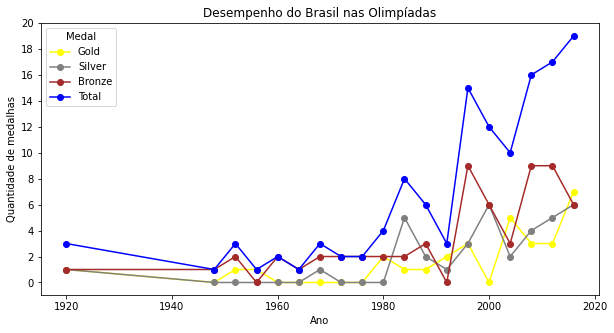

In [467]:
# EXTRA: gráfico da quantidade de medalhas do Brasil por edição das olimpiadas
grafic = df_BRA_olympic_medals.plot(color={'Gold': 'yellow', 'Silver': 'grey', 'Bronze': 'brown', 'Total': 'blue'}, figsize = (10, 5), style = 'o-')
grafic.set_ylabel('Quantidade de medalhas')
grafic.set_xlabel('Ano')
grafic.set_yticks(np.linspace(0, 20, 11))
grafic.set_title('Desempenho do Brasil nas Olimpíadas');
